Implémentez les opérations de filtrage pour débruiter des images avec les filtres étudiés dans le chapitre précédent : moyenneur, gaussien et médian. 

L’application d’un filtre se fera alors à l’aide d’une fonction qui prend en entrée une image et les paramètres de ce filtre (par exemple, la taille du noyau pour le filtre moyenneur). Vous pouvez vous inspirer des méthodes du module ImageFilter de Pillow.

Vous comparerez ensuite les performances de ces trois filtres. Pour cela, vous les appliquerez sur ces images bruitées et analyserez qualitativement la qualité de l’image filtrée. Trois types de bruits ont été considérés : bruit gaussien, speckle et “poivre et sel”.

Vous étudierez également l’influence de chaque paramètre des filtres sur l’image débruitée en faisant varier leur valeur.

Livrables:

- Un classeur iPython où les trois filtres sont implémentés et appliqués aux images bruitées (en faisant varier les paramètres)
- Un court rapport dans lequel vous expliquerez les avantages et inconvénients de chacun des trois filtres


In [90]:
from PIL import Image, ImageFilter
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np

In [76]:
original_images = dict.fromkeys(["lena_original.png","lena_bruit_gaussien.png",
                           "lena_speckle.png","lena_poivre_et_sel.png"])

for filename in original_images:
    exec("%s = Image.open(filename).convert('L')" %(filename[:-4]))
    exec("original_images[filename] = %s" %(filename[:-4]))

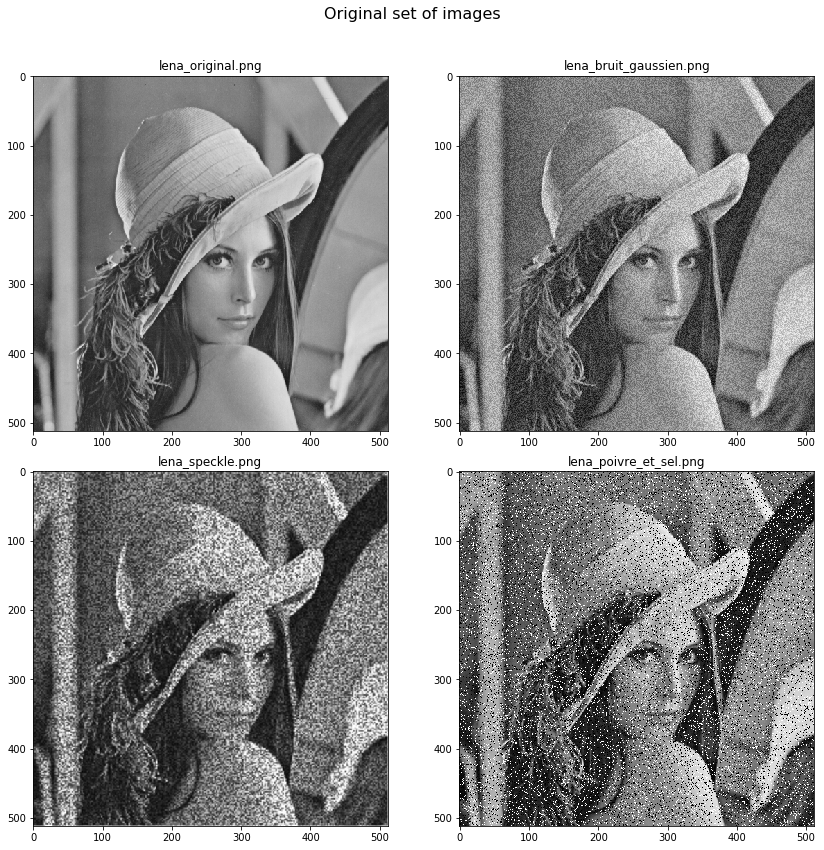

In [88]:
fig, axs = plt.subplots(2,2,figsize=(12, 12))
fig.suptitle("Original set of images", fontsize=16)
for ax, image_name in zip(axs.reshape(-1),original_images):
    ax.imshow(original_images[image_name])
    ax.set_title(image_name)
fig.tight_layout()
fig.subplots_adjust(top=0.90)

In [135]:
def filtreMoyenneur(image, rayon):
    mat = np.array(image)
    filteredMat = np.zeros(mat.shape)
    for i in range(rayon,filteredMat.shape[0]-rayon):
        for j in range(rayon,filteredMat.shape[1]-rayon):
            filteredMat[i,j] = mat[i-rayon:i+rayon+1,j-rayon:j+rayon+1].sum()/((2*rayon+1)**2)
    return Image.fromarray(filteredMat).convert('L')

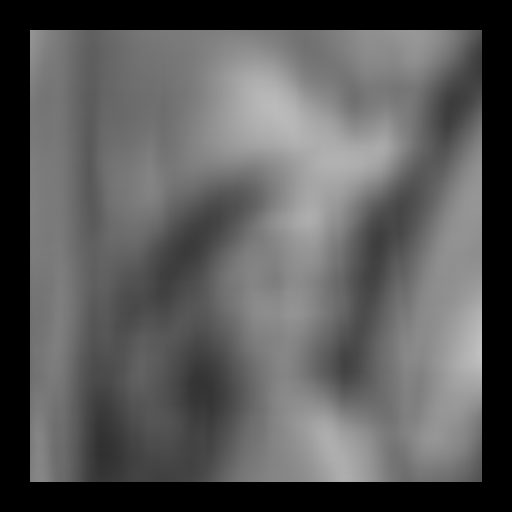

In [166]:
filtreMoyenneur(lena_poivre_et_sel,30)

In [159]:
filtreMoyenneur(lena_poivre_et_sel,1).getpixel((310,310))

145

In [160]:
lena_poivre_et_sel.filter(ImageFilter.BoxBlur(radius=1)).getpixel((310,310))

146

In [156]:
def filtreMedian(image, rayon):
    mat = np.array(image)
    filteredMat = np.zeros(mat.shape)
    for i in range(rayon,filteredMat.shape[0]-rayon):
        for j in range(rayon,filteredMat.shape[1]-rayon):
            filteredMat[i,j] = np.median(mat[i-rayon:i+rayon+1,j-rayon:j+rayon+1])
    return Image.fromarray(filteredMat).convert('L')

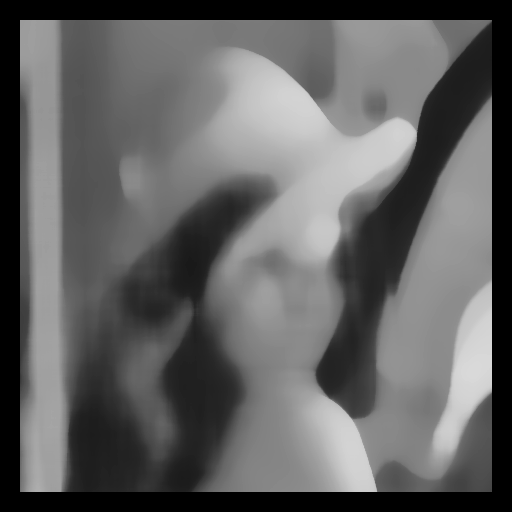

In [165]:
filtreMedian(lena_poivre_et_sel,20)

In [161]:
filtreMedian(lena_poivre_et_sel,1).getpixel((310,310))

159

In [ ]:
def filtreGaussien(image, rayon):
    mat = np.array(image)
    filteredMat = np.zeros(mat.shape)
    for i in range(rayon,filteredMat.shape[0]-rayon):
        for j in range(rayon,filteredMat.shape[1]-rayon):
            filteredMat[i,j] = mat[i-rayon:i+rayon+1,j-rayon:j+rayon+1].sum()/((2*rayon+1)**2)
    return Image.fromarray(filteredMat).convert('L')

In [162]:
lena_poivre_et_sel.filter(ImageFilter.MedianFilter(size=3)).getpixel((310,310))

159

In [150]:
a = np.ones((5,5))

In [154]:
np.median(a)

1.0

In [15]:
f = ImageFilter.Filter()
mf = ImageFilter.MedianFilter(size=3)
bbf = ImageFilter.BoxBlur(radius=1)
gbf = ImageFilter.GaussianBlur(radius=1)

In [23]:
lena_original.show()
lgs_img.filter(mf).show()
lgs_img.filter(bbf).show()
lgs_img.filter(gbf).show()

In [18]:
# Appliquer le lissage par moyennage (fenêtre de taille 9) et afficher le résultat
noisy_img.filter(ImageFilter.BoxBlur(1)).show()

'L'

In [ ]:
#do POO
#image inline